# mOWL: Python library for machine learning with ontologies

mOWL is a Python library designed to standardize machine learning models that use ontologies as main data source.
To get familiar with the models implemented in mOWL and more information about the library we recommend the following documents:
- [Semantic similarity and machine learning with ontologies](https://academic.oup.com/bib/article/22/4/bbaa199/5922325)
- [mOWL: Python library for machine learning with biomedical ontologies](https://academic.oup.com/bioinformatics/article/39/1/btac811/6935780?login=true)
- [mOWL documentation](https://mowl.readthedocs.io/en/latest/index.html)

The topics we cover in this tutorial are:
- mOWL intallation
- Creation of an simple ontology: Family Domain
- Graph-based embeddings using random walks

## Ontology creation:
To get started, you can install mOWL using pip:

## mOWL installation:

mOWL is available on the [PyPi repository](https://pypi.org/project/mowl-borg/) and the source code is available on [Github](https://github.com/bio-ontology-research-group/mowl). For this tutorial we will install mOWL from PyPi using the following command:

In [1]:
!pip install mowl-borg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.3/739.3 kB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 23.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvi

## Import mOWL

mOWL interfaces the OWL API. For this, we need to interface with the Java Virtual Machine (JVM). A common problem arises if Java is not installed in your working machine.

In [2]:
import mowl
mowl.init_jvm("10g") # amount of memory assigned to the JVM

Now, let's import some objects from the OWLAPI and Java

In [3]:
import os
from java.util import HashSet
from mowl.owlapi import OWLAPIAdapter
from org.semanticweb.owlapi.model import IRI
from mowl.corpus.base import extract_and_save_annotation_corpus

### Imports για την πτυχιακή

In [4]:
import mowl.datasets.builtin
from mowl.corpus.base import extract_and_save_annotation_corpus

#mowl
from mowl.datasets.builtin import PPIYeastSlimDataset
from mowl.corpus import extract_and_save_axiom_corpus, extract_and_save_annotation_corpus
from mowl.owlapi import OWLAPIAdapter
from mowl.reasoning import MOWLReasoner
from mowl.projection import TaxonomyProjector, TaxonomyWithRelationsProjector, DL2VecProjector, OWL2VecStarProjector

#EL Reasoning
from org.semanticweb.elk.owlapi import ElkReasonerFactory
from java.util import HashSet

#deepwalks
from mowl.walking.deepwalk.model import DeepWalk
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

#KMeans
from sklearn.cluster import KMeans
import numpy as np


INFO:pykeen.utils:Using opt_einsum


# Graph-based embeddings


Ontologies are formed by a TBox, an ABox and an RBox. A Knowledge
Graph can be easily extracted from the ABox and the RBox. However, to
encode the graph representation of the TBox, which is composed by
(complex) concept descriptions, many approaches have been developed. In mOWL, we provide some
methods that perform ontology projection into graphs:

- **Taxonomy projection**: the projection of axioms of the form $A
\sqsubseteq B$ as edges $(A, subclassof, B)$.

- **Taxonomy + relations**: the projection of axioms of the form $A
\sqsubseteq B$ and $A \sqsubseteq \exists R.B$ as edges $(A,
subclassof, B)$ and $(A, R, B)$, respectively.

- **DL2Vec projection**

- **OWL2Vec projection**

In [6]:
from mowl.projection import TaxonomyProjector, TaxonomyWithRelationsProjector, DL2VecProjector, OWL2VecStarProjector
from mowl.datasets import PathDataset
dataset = PathDataset("go-plus.owl")

## Taxonomy projector (Hierarchy only)

In [ ]:
edges = TaxonomyProjector().project(dataset.ontology)



for edge in edges:

    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

In [ ]:
# Auxiliary method to create plots
def nx_network(edges):
    import networkx as nx
    import matplotlib.pyplot as plt
    G = nx.DiGraph()
    for edge in edges:
        src = edge.src.split("/")[-1]
        dst = edge.dst.split("/")[-1]
        G.add_edge(src, dst)
    #nx draw with custom colors
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='cyan', alpha=0.9,
            labels={node:node for node in G.nodes()})
    #nx.draw(G, with_labels=True)
    plt.show()

In [ ]:
nx_network(edges)

NameError: name 'edges' is not defined

## DL2Vec projector

In [ ]:
dl2vec_proj = DL2VecProjector(bidirectional_taxonomy=True)
d2v_edges = dl2vec_proj.project(dataset.ontology, with_individuals=True)

for edge in d2v_edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

Jane	hasChild	Melissa
Parent	hasChild	Person
John	hasChild	Melissa
Female	subclassof	Person
Person	superclassof	Female
Father	subclassof	Male
Male	superclassof	Father
Jane	hasChild	Robert
Male	subclassof	Person
Person	superclassof	Male
Parent	subclassof	Person
Person	superclassof	Parent
Mother	subclassof	Female
Female	superclassof	Mother
John	hasChild	Robert


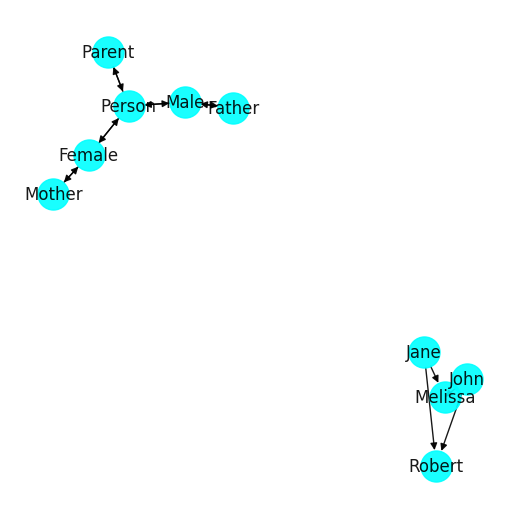

In [ ]:
nx_network(d2v_edges)


## OWL2Vec* projector

In [ ]:
owl2vec_proj = OWL2VecStarProjector(bidirectional_taxonomy=True)
o2v_edges = owl2vec_proj.project(dataset.ontology)

<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>
<class 'mowl.projection.edge.Edge'>


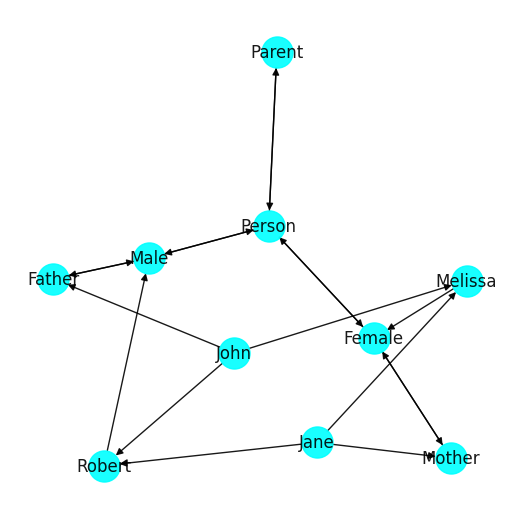

In [ ]:
for edge in o2v_edges:
  print(type(edge))

nx_network(o2v_edges)


# Random walk embeddings of a graph

After generating the graph, we can embed it in different ways. Two approaches are supported in mOWL:
- Embeddings based on random walks
- Embeddings based on KGE

Let's try the approach with random walks.

The method to generate the walks will be [DeepWalk]()w

In [ ]:
from mowl.walking.deepwalk.model import DeepWalk
walker =  DeepWalk(
             100, #num_walks,
             5, #walk_length,
             0.1, #alpha
             outfile = "walks_dw.txt", # /optional/path/to/save/walks,
             workers = 4)

## Using the Taxonomy projection edges

In [ ]:
walker.walk(o2v_edges)

In [ ]:
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

walk_corpus_file = walker.outfile
sentences = LineSentence(walk_corpus_file)

w2v_model = Word2Vec(sentences,vector_size=20) #size = 20

NameError: name 'walker' is not defined

## Using the DL2Vec projection edges

In [ ]:
from mowl.walking.node2vec.model import Node2Vec
walker =  Node2Vec(
             10, #num_walks,
             10, #walk_length,
             outfile = "walks_n2v.txt", # /optional/path/to/save/walks,
             workers = 4)
walker.walk(d2v_edges)

In [ ]:
walk_corpus_file = walker.outfile
sentences = LineSentence(walk_corpus_file)

w2v_model = Word2Vec(sentences,vector_size = 10) #size = 10

In [ ]:
w2v_model.wv.most_similar("http://Father")

[('http://Male', 0.5302985310554504),
 ('http://Person', 0.5038045644760132),
 ('http://subclassof', 0.4931863844394684),
 ('http://hasChild', 0.4850304126739502),
 ('http://superclassof', 0.47974687814712524),
 ('http://Female', 0.4763571321964264),
 ('http://Parent', 0.4295019805431366),
 ('http://Mother', 0.31269100308418274),
 ('http://Jane', 0.302691787481308),
 ('http://Melissa', 0.09689121693372726)]

# Get Word2vec Embeddings from OWL2Vec* projector and DeepWalks
()

In [ ]:
from mowl.datasets import PathDataset
dataset = PathDataset("go-plus.owl")
projector = OWL2VecStarProjector(bidirectional_taxonomy=True) # take the dataset graph, project it onto a different rdf graph using OWL2Vec* rules
new_edges = projector.project(dataset.ontology) #project onto graph

In [ ]:
corpus_file = "walks_gene_ontology.txt"

#generating the DeepWalk model to iterate over the Graph
walker =  DeepWalk(
             200, #number of walks,
             10, #walk length,
             0.05, #alpha: restart parameter
             outfile = corpus_file, # /optional/path/to/save/walks,
             workers = 4)

walker.walk(new_edges) #start the walk
walk_corpus_file = walker.outfile
#sentences = LineSentence(walk_corpus_file) #get the sentences for the word2vec algorithm
#w2v_model = Word2Vec(sentences, vector_size=50)




In [ ]:
from google.colab import files
files.download('walk_gene_ontology.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
my_dataset = dataset #working on the above dataset
i = 0


for edge in my_dataset.ontology.getAxioms(): #print some axioms
  i+=1
  if i > 20:
    break
  else:
    print(edge)






#word2vec output
model_keys = w2v_model.wv.key_to_index
print(sorted([w for w in model_keys]))




SubClassOf(<http://purl.obolibrary.org/obo/GO_0140829> <http://purl.obolibrary.org/obo/GO_0015106>)
Declaration(Class(<http://purl.obolibrary.org/obo/CHEBI_63953>))
AnnotationAssertion(rdfs:label <http://purl.obolibrary.org/obo/GO_0140449> "centromere-nuclear envelope anchor activity")
AnnotationAssertion(Annotation(<http://www.geneontology.org/formats/oboInOwl#hasDbXref> "GOC:dph") Annotation(<http://www.geneontology.org/formats/oboInOwl#hasDbXref> "GOC:mah") Annotation(<http://www.geneontology.org/formats/oboInOwl#hasDbXref> "GOC:tb") <http://purl.obolibrary.org/obo/IAO_0000115> <http://purl.obolibrary.org/obo/GO_0031991> "Any process that modulates the frequency, rate or extent of contraction of the actomyosin ring involved in cytokinesis that takes place as part of a cell cycle.")
AnnotationAssertion(<http://www.geneontology.org/formats/oboInOwl#hasRelatedSynonym> <http://purl.obolibrary.org/obo/UBERON_0002080> "ventriculus dexter")
AnnotationAssertion(Annotation(<http://www.geneon

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Save the word vectors to a text file
with open('OWL2VecStar_projection_with_word2vec_embeddings_.txt', 'w', encoding='utf-8') as f:
    for word in model_keys:
        vector = ' '.join(map(str, w2v_model.wv[word]))
        f.write(f'{word} {vector}\n')

# Get Some Clusters


In [16]:
from sklearn.cluster import KMeans
import numpy as np

def load_word_embeddings(file_path):
    word_embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' ')
            word = parts[0]
            vector = np.array(parts[1:], dtype=float)
            word_embeddings[word] = vector
    return word_embeddings

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def load_word_embeddings(file_path):
    word_embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' ')
            word = parts[0]
            vector = np.array(parts[1:], dtype=float)
            word_embeddings[word] = vector
    return word_embeddings

def cluster_word_embeddings(word_embeddings, num_clusters):
    words = list(word_embeddings.keys())
    embeddings = list(word_embeddings.values())

    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(embeddings)

    clusters = {}
    for i, word in enumerate(words):
        cluster_label = kmeans.labels_[i]
        if cluster_label not in clusters:
            clusters[cluster_label] = []
        clusters[cluster_label].append(word)

    return clusters

file_path = 'OWL2VecStar_projection_with_word2vec_embeddings_.txt'
num_clusters = 10 #number of clusters
word_embeddings = load_word_embeddings(file_path)

clusters = cluster_word_embeddings(word_embeddings, num_clusters) #run the clustering model

with open('word_vectors_clusters.txt', 'w', encoding='utf-8') as f:
  for cluster_label, words in clusters.items():
    f.write(f"Cluster {cluster_label}: {words}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Get annotation Corpus

In [ ]:
from mowl.corpus import extract_and_save_annotation_corpus
filename = "annotation_corpus_gene_ontology.txt"

# Define an empty list to act as the placeholder for the corpus
corpus = []

# Call the function with the ontology and file path
extract_and_save_annotation_corpus(dataset.ontology,
                                    filename,
                                    mode="w")



NameError: name 'corpus' is not defined

In [ ]:
import numpy as np
import math
data =
np.random.seed(seed=42) # Fix random seed for reproducibility
np.random.shuffle(data)
train_n = int(math.ceil(len(data) * 0.8))
valid_n = int(math.ceil(train_n * 0.8))
train_data = data[:valid_n]
valid_data = data[valid_n:train_n]
test_data = data[train_n:]
print('Number of training interactions:', len(train_data))
print('Number of validation interactions:', len(valid_data))
print('Number of testing interactions:', len(test_data))

#Second approach: Graph embeddings using TransE

In [7]:
from mowl.models import GraphPlusPyKEENModel
from mowl.projection import DL2VecProjector
from pykeen.models import TransE
import torch as th

model = GraphPlusPyKEENModel(dataset) #using the mowl wrapper, we can get an ontology, apply OWL2VEC* projection, and then run TransE as needed

model.set_projector(OWL2VecStarProjector())
model.set_kge_method(TransE, random_seed=42)

model.optimizer = th.optim.Adam
model.lr = 0.001
model.batch_size = 32
model.train(epochs = 1) #epochs should be 3-5 if you run on colab. More epochs will produce better accuracy

# Get embeddings

class_embs = model.class_embeddings
role_embs = model.object_property_embeddings
ind_embeddings = model.individual_embeddings



Training epochs on cpu:   0%|          | 0/1 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/12198 [00:00<?, ?batch/s]

FileNotFoundError: [Errno 2] No such file or directory: 'transe_embeddings_ALL.txt'

Save the embeddings on a different file

In [14]:

with open("transe_embeddings.txt","w") as f:
  for protein in class_embs:
    line = str(protein) + " " + str(str(class_embs[protein]))
    f.write(line)
  #f.write(str(class_embs))

In [ ]:
import json
class_embs = model.class_embeddings
role_embs = model.object_property_embeddings
with open("transe_embeddings.txt","w") as f:
  for key in role_embs:
    line = str(key) + " "+ str(role_embs[key])
    f.write(line)
#ind_embs = model.individual_embeddings

# Get similar proteins using cosine similarity

In [40]:
from numpy import dot
from numpy.linalg import norm

"""
take the transe embeddings from a txt file, remove all the formatting characters and output a dictionary where every key is a protein and
every value is the corresponding embedding
"""
def load_transe_embeddings(file_path):

    word_embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as file:
          parts = file.read()
          parts= parts.strip()  #remove whitespaces on the beggining and the end
          parts = parts.split(']') #split into a list of different embeddings

          for embedding in parts:
            #embedding = embedding.strip()

            #remove formatting
            embedding = embedding.replace("[", "")
            embedding = embedding.replace("\n", "")

            #eache of the embedding values is seperated with a whitespace character, so we are creating a list with all the embeddings
            embedding_list = embedding.split(" ")
            word = embedding_list[0]

            vectorlist = []
            for item in embedding_list:
              try:
                vectorlist.append(float(item))
              except:
                continue

            vector = np.array(vectorlist, dtype=float) #all vectors are turned into a numpy array
            word_embeddings[word] = vector #add to dictionary


    return word_embeddings


def compute_cosine_similarity(vector,word_embeddings):
  similarity_ranks ={}
  i = 0

  for embedding in word_embeddings:

    try:
      similarity_ranks[embedding] = dot(vector, word_embeddings[embedding])/(norm(vector)*norm(word_embeddings[embedding]))  #cosine_similiraty = dot(a, b)/(norm(a)*norm(b))
    except:
      similarity_ranks[embedding] = 0
    i += 1 #iterate

  return similarity_ranks

def top_k_similar(word_embeddings,k): # Get the top k  mosti similar items
  sorted_items = sorted(word_embeddings.items(), key=lambda item: item[1], reverse=True)

  top_k_items = sorted_items[:k]

  return top_k_items

word_embeddings = load_word_embeddings("OWL2VecStar_projection_with_word2vec_embeddings_.txt") #load a dictionary with all the word embeddings from the syntactical analysis

test_embedding = word_embeddings["http://purl.obolibrary.org/obo/GO_0062085"] #example test


similarity = compute_cosine_similarity(test_embedding,word_embeddings) #create similarity dictionary. (protein, cosine_sim(test_embedding,protein)) as key-value pairs


most_similar = top_k_similar(similarity,10)
for protein in most_similar:
  print(protein)

print("AND NOW TRANSE EMBEDDINGS:")
word_embeddings = load_transe_embeddings("transe_embeddings.txt") #load a dictionary with all the word embeddings from the transe algorithm
i=0
"""
for embedding in word_embeddings:
  print(embedding,word_embeddings[embedding],len(word_embeddings[embedding]))
  i+=1
  if i ==20:
    break
"""
similarity = compute_cosine_similarity(test_embedding,word_embeddings)

most_similar = top_k_similar(similarity,10)
for protein in most_similar:
  print(protein)



('http://purl.obolibrary.org/obo/GO_0062085', 1.0000000000000002)
('http://purl.obolibrary.org/obo/GO_0045227', 0.9070664249222369)
('http://purl.obolibrary.org/obo/GO_1901915', 0.8935910209536095)
('http://purl.obolibrary.org/obo/GO_0060635', 0.8659759721214098)
('http://purl.obolibrary.org/obo/GO_0062084', 0.8605538275656214)
('http://purl.obolibrary.org/obo/GO_0010557', 0.8109510404455462)
('http://purl.obolibrary.org/obo/GO_2001008', 0.7914334456214795)
('http://purl.obolibrary.org/obo/GO_0045726', 0.7870599078556005)
('http://purl.obolibrary.org/obo/GO_0046985', 0.7851064996036918)
('http://purl.obolibrary.org/obo/GO_1901913', 0.7680510594658835)
AND NOW TRANSE EMBEDDINGS:
('http://purl.obolibrary.org/obo/CHEBI_132742', 0.5374056296496189)
('http://purl.obolibrary.org/obo/CHEBI_33276', 0.5262754733279006)
('http://purl.obolibrary.org/obo/GO_0016015', 0.520548503542421)
('http://purl.obolibrary.org/obo/GO_0016701', 0.5194607793879619)
('http://purl.obolibrary.org/obo/GO_0071136', 0